<a href="https://colab.research.google.com/github/ashishdhawas/Retail-Sales-Prediction-Regression/blob/main/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Predicting retail sales can be a challenging task, as it involves forecasting consumer behavior and market trends. However, it is an important task for businesses, as accurate sales predictions can help them make informed decisions about inventory management, marketing strategies, and financial planning.

There are several approaches that can be taken to predict retail sales. One common approach is to use statistical models and machine learning techniques to analyze past sales data and identify patterns that may be used to forecast future sales. This may involve using techniques such as regression analysis.

Another approach is to gather data from external sources, such as economic indicators, demographic data, and consumer sentiment data, and use this information to inform the sales prediction model. This can help to incorporate external factors that may impact sales and improve the accuracy of the forecast.

Regardless of the approach taken, it is important to validate the accuracy of the sales prediction model through testing and to continuously update and refine the model as new data becomes available. This can help to ensure that the model remains relevant and accurate over time.

The interest for a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. For a good sales forecast, it is extremely important to get a good dataset as well. Forecasts heavily depend on the past records, trends and patterns observed for sales of a particular store. The variations could be due to a number of reasons. Talking from a business’s point of view, these sales forecasts are done consistently to improve their sales forecasting models as they directly impact their decision making process, goals, plans and growth strategies. In this Retail Sales Prediction, machine learning models are created that predict sales of these 1115 drug stores across the European market and compare the results of these models. In addition to this, an effort has been made to analyze and find all the features that are contributing to higher sales and the features which are leading to lower sales, so that improvement plans can be worked upon.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

rossmann_df = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/store.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rossmann_df.shape

(1017209, 9)

We see here that the rossmann dataset consists of 1017209 values and 9 features

In [6]:
store_df.shape

(1115, 10)

the store dataset consists of 1115 values and 10 features

### Dataset Information

In [7]:
# Dataset Info
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
rossmann_df[rossmann_df.duplicated()].shape[0]

0

In [10]:
store_df[store_df.duplicated()].shape

(0, 10)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values. we have to clean those data. Let's start checking....

<Axes: >

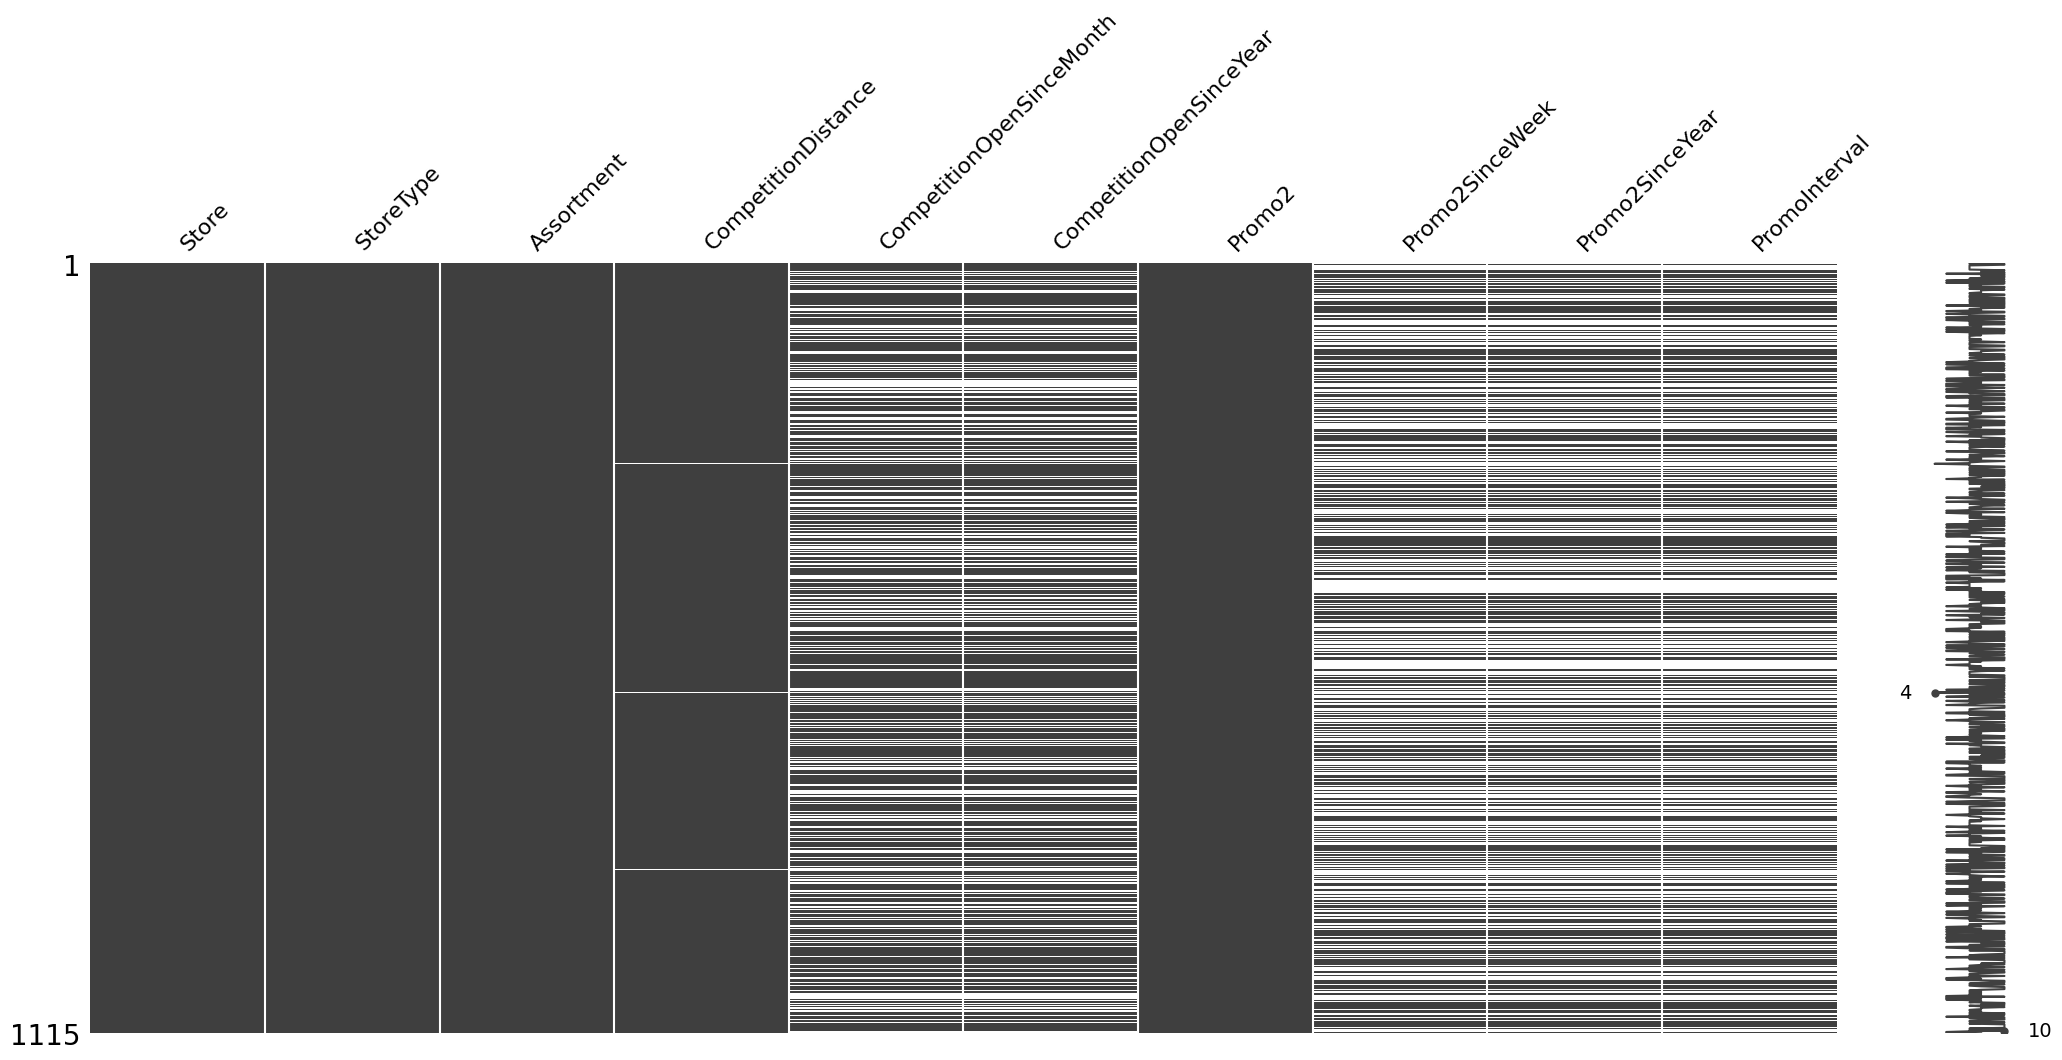

In [13]:
# Visualizing the missing values
import missingno as msno   

msno.matrix(store_df)

### What did you know about your dataset?

The matrix above show the null value in each of the row of our dataframe. The white horizontal line show the null values of each column of particular rows. We see that the column CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval contains the maximum null values which matches our data also

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
# Dataset Describe
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
store_df.describe(include=object)

,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


### Variables Description 

We have been provided with 2 data sets.

**1) Rosemann store Data: Information about sales and related factors**

Store: Unique Store Id.

DayOfWeek: No. of day of the week.

Date: current Date of the day.

Sales: no. of sales of the day.

Customers: footfall of the day.

Open: store is open or closed.

Promo: Store running promotion or not.

StateHoliday: state holiday or not.

SchoolHoliday: school holiday or not.


**2) Store: Information about the store**

Store: Unique Store Id.

StoreType: 4 different type of stores a,b,c,d.

Assortment: A collection of goods or services that a business provides to a consumer.

CompetitionDistance: distance in meters to the nearest competitor store.

CompetitionOpenSinceMonth: Month in which the competition store was open.

CompetitionOpenSinceYear: Year in which the competition store was open.

Promo2: Store running consecutive promotion or not.

Promo2SinceWeek: calendar week when the store started participating in Promo2.

Promo2SinceYear: year when the store started participating in Promo2.

PromoInterval:The month in which the promotion starts eg: Jan,Apr,Jul,Oct.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print(rossmann_df.apply(lambda col: col.unique()))


Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [19]:
print(store_df.apply(lambda col: col.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

# Handle Missing Values

1. **CompetitionDistance**

In [20]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


So, we can fill these three values with many ways such as 0 or mean or mode or median. We decided to fill with it Median.

In [21]:
## code for replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

2. **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**

There are not much information provided to these data. Also we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [22]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

In [23]:
## Now checking Nan values
store_new.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [24]:
final_df = pd.merge(rossmann_df, store_new, on='Store', how='left')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [25]:
final_df.shape

(1017209, 18)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

**Changing different dtypes to int type.**

In [27]:
# code for changing format of date from object to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], format= '%Y-%m-%d')

In [28]:
final_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_df['Date']).month

In [29]:
final_df['CompetitionOpenSinceYear']= final_df['CompetitionOpenSinceYear'].astype(int)
final_df['Promo2SinceYear']= final_df['Promo2SinceYear'].astype(int)
final_df['CompetitionDistance']= final_df['CompetitionDistance'].astype(int)
final_df['Promo2SinceWeek']= final_df['Promo2SinceWeek'].astype(int)

In [30]:
# code for changing StateHoliday dtype from object to int.
final_df.loc[final_df['StateHoliday'] == '0', 'StateHoliday'] = 0
final_df.loc[final_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
final_df.loc[final_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
final_df.loc[final_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
final_df['StateHoliday'] = final_df['StateHoliday'].astype(int, copy=False)

print('levels :', final_df['StateHoliday'].unique(), '; data type :', final_df['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [31]:
# code for changing Assortment dtype from object to int.
final_df.loc[final_df['Assortment'] == 'a', 'Assortment'] = 0
final_df.loc[final_df['Assortment'] == 'b', 'Assortment'] = 1
final_df.loc[final_df['Assortment'] == 'c', 'Assortment'] = 2
final_df['Assortment'] = final_df['Assortment'].astype(int, copy=False)

print('levels :', final_df['Assortment'].unique(), '; data type :', final_df['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [32]:
# code for changing StoreType dtype from object to int.
final_df.loc[final_df['StoreType'] == 'a', 'StoreType'] = 0
final_df.loc[final_df['StoreType'] == 'b', 'StoreType'] = 1
final_df.loc[final_df['StoreType'] == 'c', 'StoreType'] = 2
final_df.loc[final_df['StoreType'] == 'd', 'StoreType'] = 3
final_df['StoreType'] = final_df['StoreType'].astype(int, copy=False)

print('levels :', final_df['StoreType'].unique(), '; data type :', final_df['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


**checking dtypes of columns**

In [33]:
final_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

In [34]:
final_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,0,0,310,7,2013,0,0,0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,0,2,24000,7,2013,0,0,0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,0,0,7520,7,2014,0,0,0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,0,2,2030,7,2000,0,0,0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,0,0,3160,7,2009,0,0,0,0


# What all manipulations have you done and insights you found?

There are two datasets - 1) Rossmann.csv & 2) Store.csv

shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115, 10)

In both dataset 'Store' column is common. So we do inner join on the basis of column 'Store'.

On looking on datasets we find lots of Nan values in Store dataset.

Try to replace Nan values with suitable values. In CompetitionDistance 
column only 3 Nan values are there. So we replaced it with median.

Now for rest columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, romointerval) there are lots of Nan values and best way to treat this values to replace with 0.

After combining shape of final dataset = (1017209,18)
Also there is some columns such as 'StateHoliday', 'SchoolHoliday' & 'Assortment' which contains object values. So, try to change into int by giving suitable values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

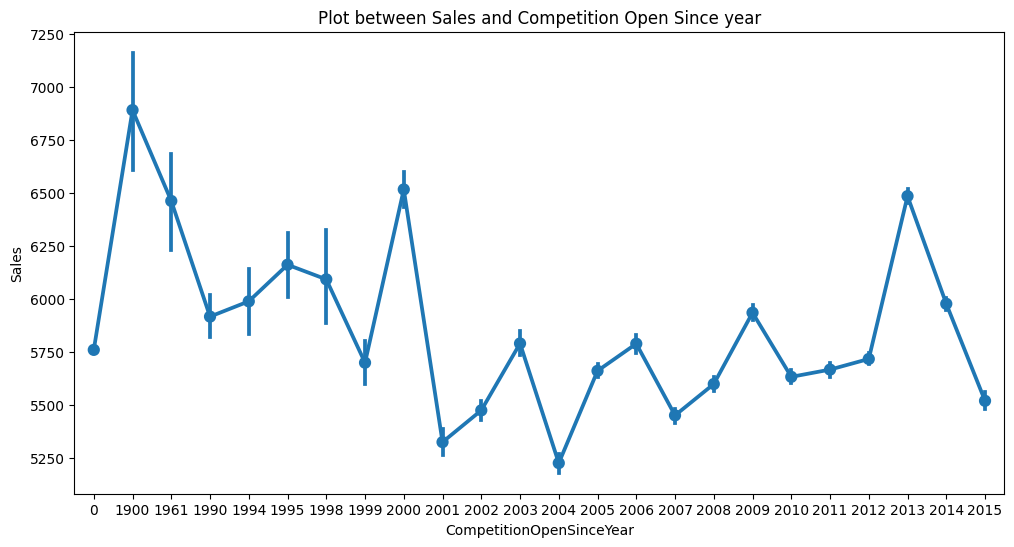

In [35]:
# Chart - 1 visualization code
plt.figure(figsize=(12,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Competition Open Since year')

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

#### Chart - 2

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

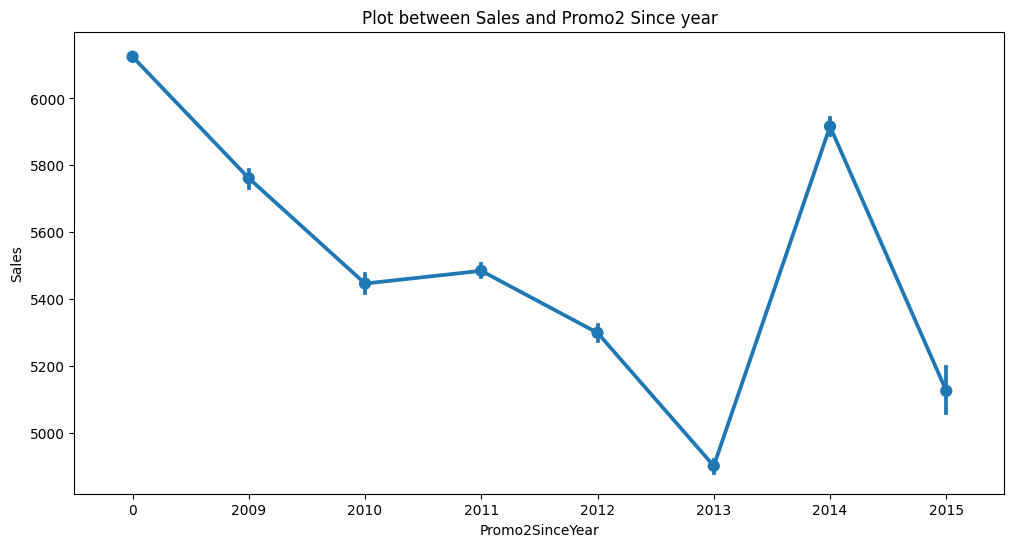

In [36]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Promo2 Since year')

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

#### Chart - 3

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

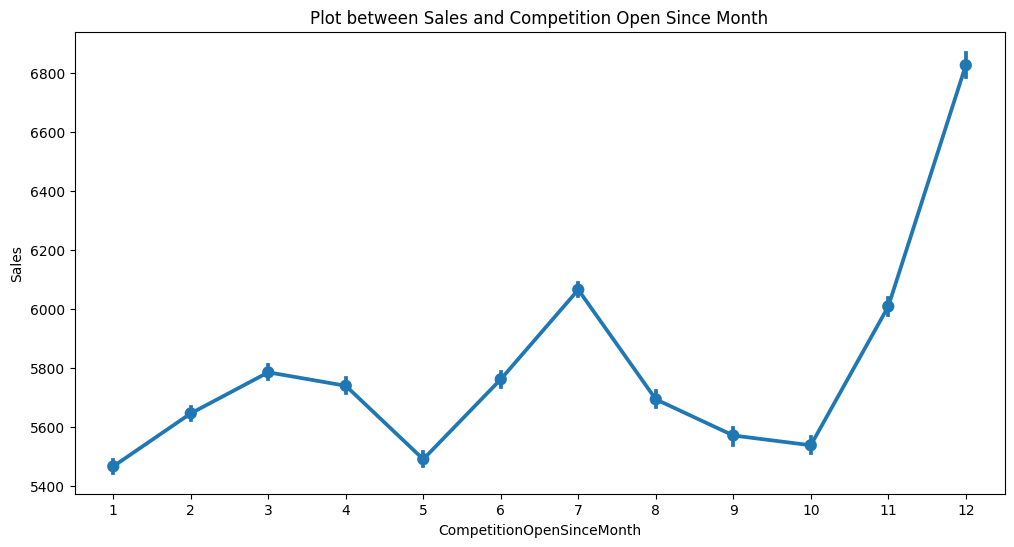

In [37]:
# Chart - 3 visualization code
plt.figure(figsize=(12,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Competition Open Since Month')

##### 2. What is/are the insight(s) found from the chart?

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

#### Chart - 4

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

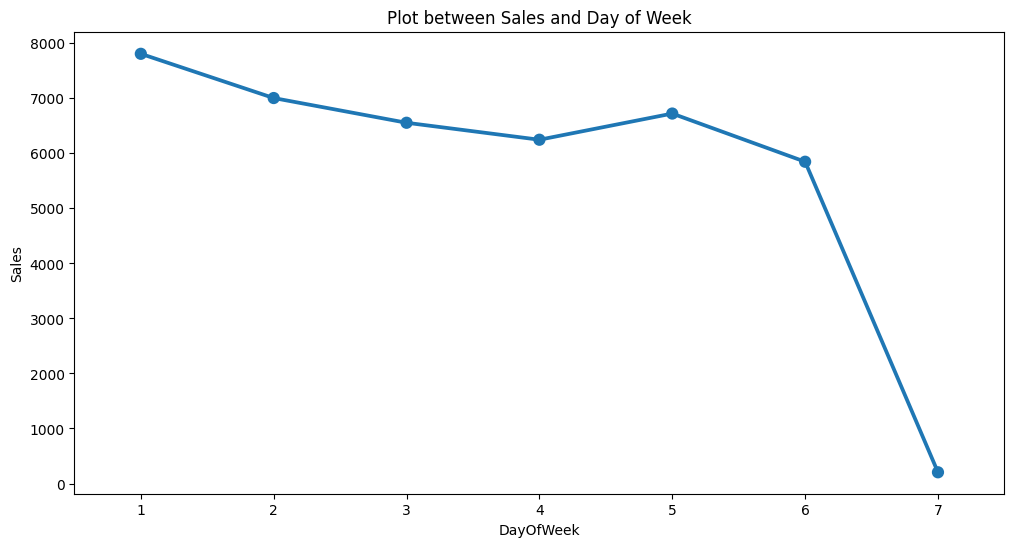

In [38]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Day of Week')

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

**BoxPlot of sales between Assortment and store type**

#### Chart - 5

Text(0.5, 1.0, 'Boxplot For Sales Values')

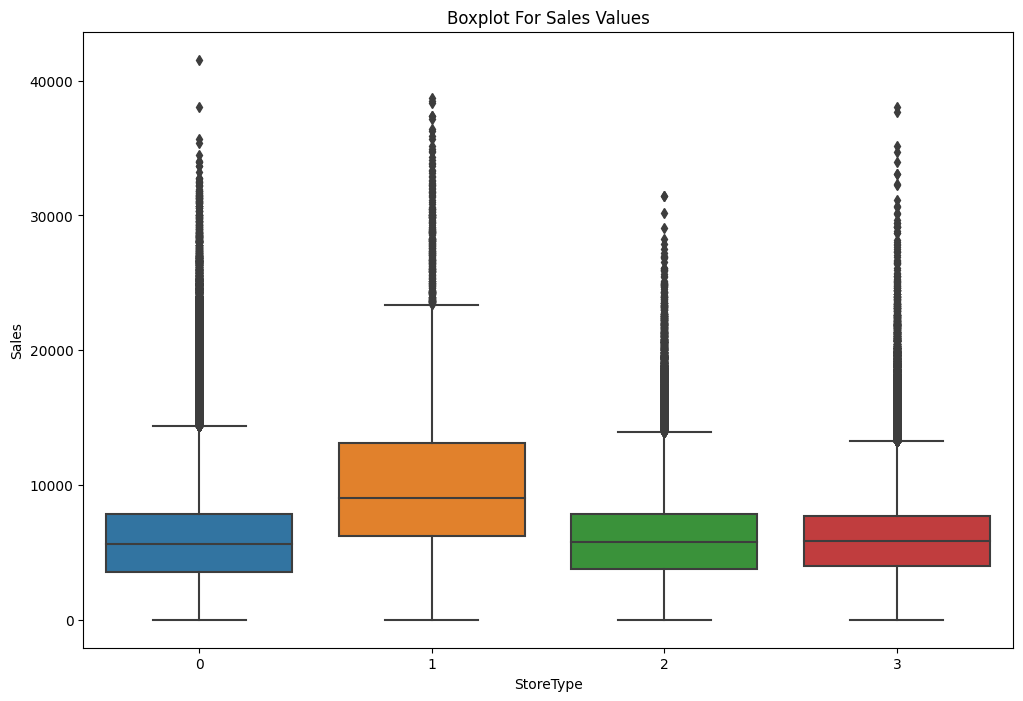

In [39]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final_df)
plt.title('Boxplot For Sales Values')

#### Chart - 6

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

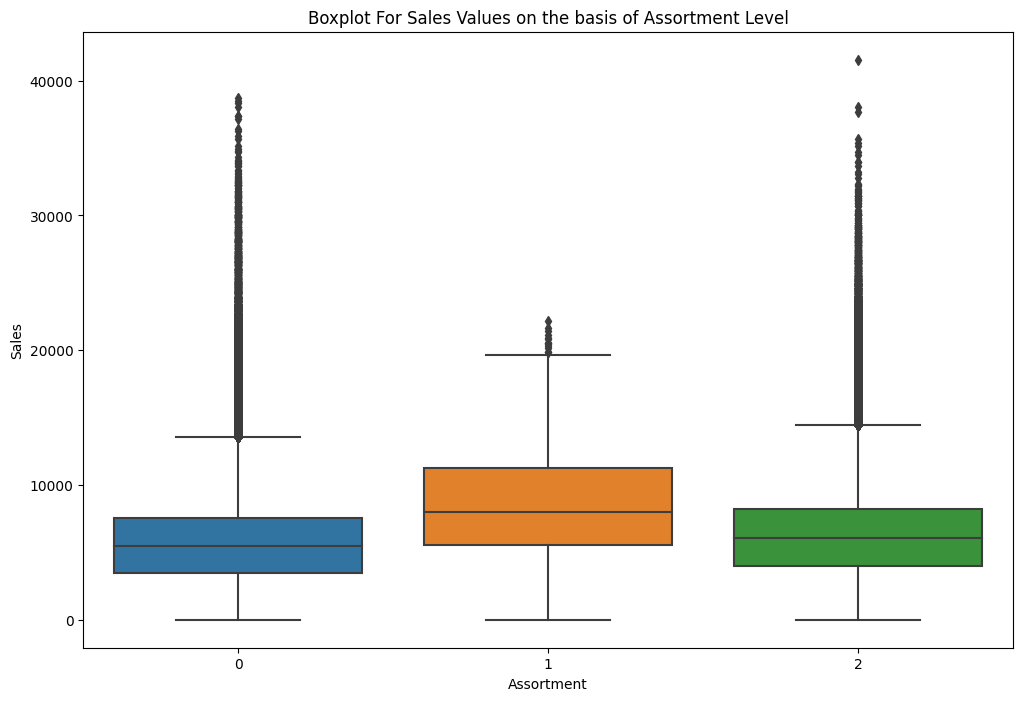

In [40]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final_df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

**Plot between Dayof Week and Open & promo.**

#### Chart - 7

Text(0.5, 1.0, 'Store Daily Open Countplot')

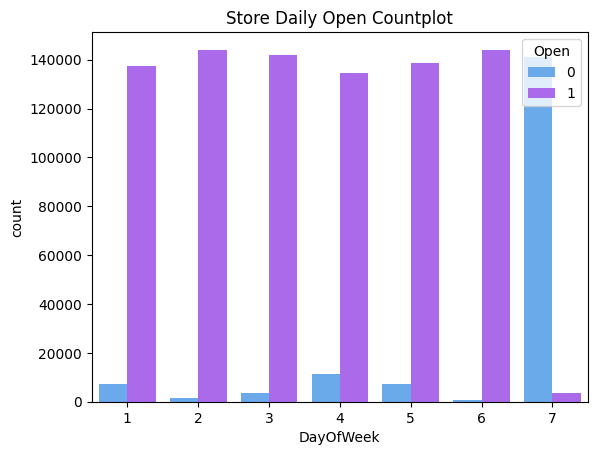

In [41]:
# Chart - 7 visualization code
sns.countplot(x= 'DayOfWeek', hue='Open', data= final_df, palette='cool')
plt.title('Store Daily Open Countplot')

#### Chart - 8

Text(0.5, 1.0, 'Store Daily Promo Countplot')

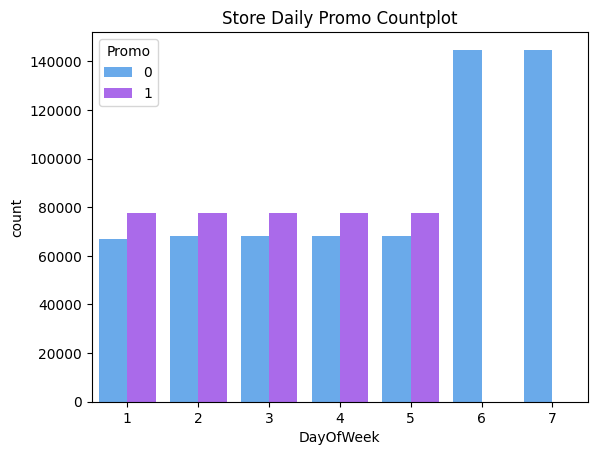

In [42]:
# Chart - 8 visualization code
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final_df, palette='cool')
plt.title('Store Daily Promo Countplot')

**Promo**

#### Chart - 9

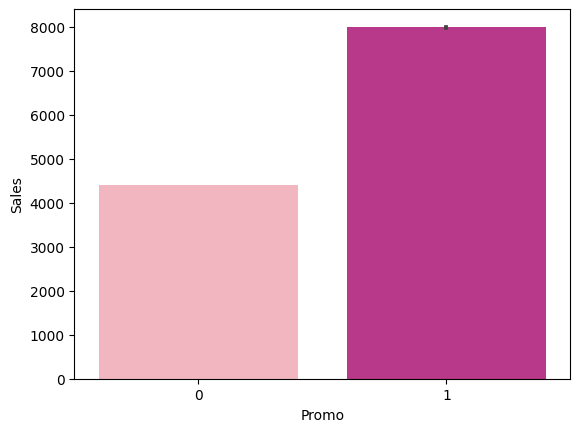

In [43]:
# Chart - 9 visualization code
promo_sales = sns.barplot(x="Promo", y="Sales", data=final_df, palette='RdPu')

##### 2. What is/are the insight(s) found from the chart?

Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.



# **StateHoliday and SchoolHoliday**

#### Chart - 10

**Sales during State Holiday**

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

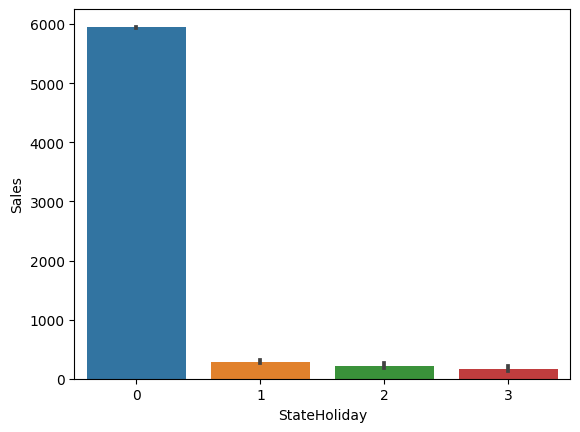

In [44]:
# Chart - 10 visualization code
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final_df)

#### Chart - 11

**Sales during school holiday**

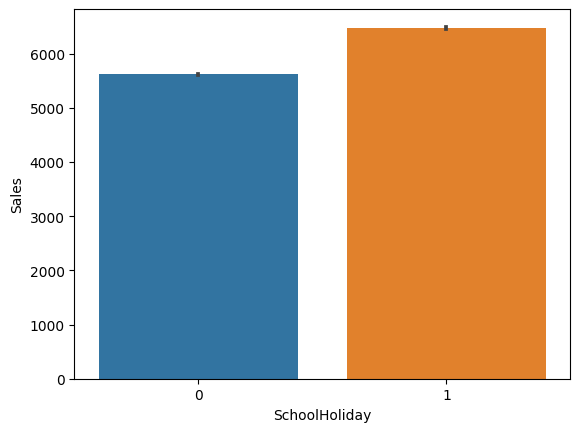

In [45]:
# Chart - 11 visualization code
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final_df)

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

# Store Type

#### Chart - 12

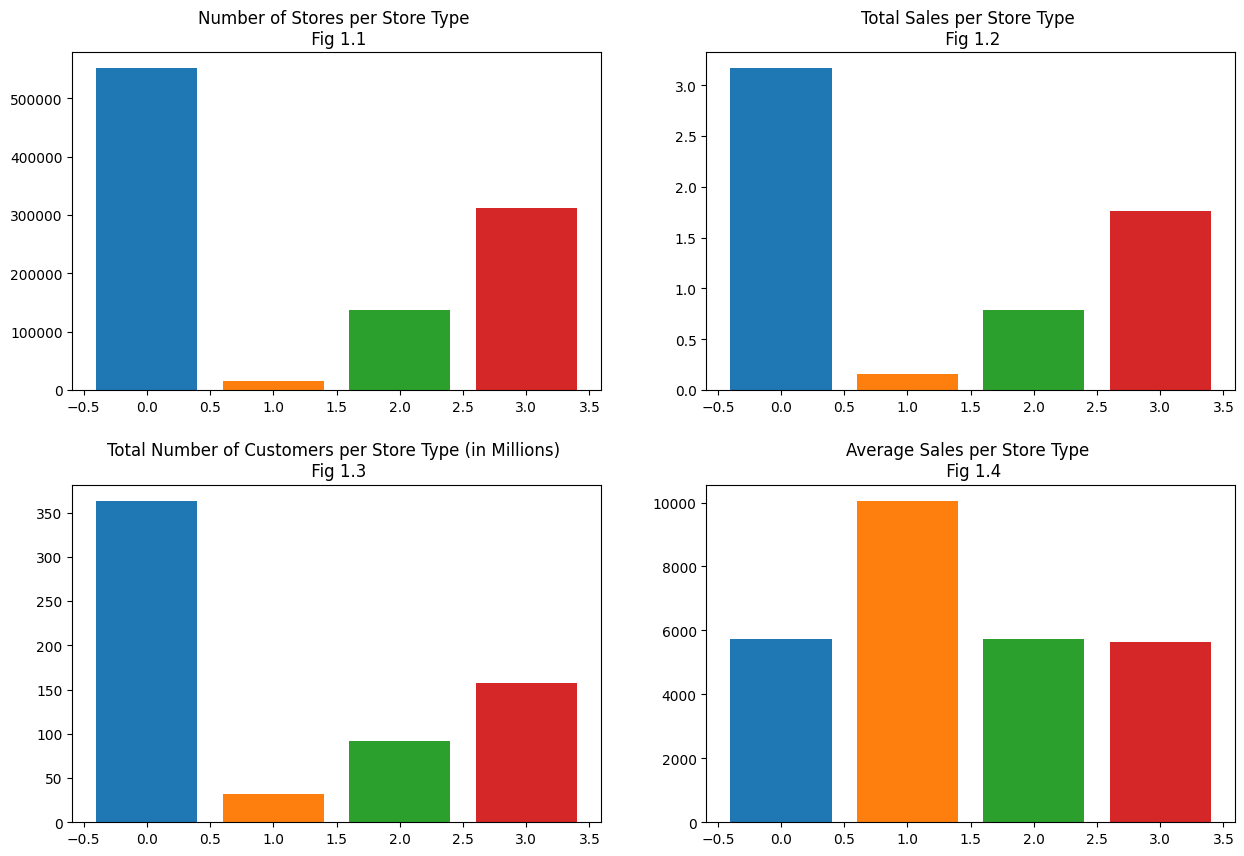

In [46]:
# Chart - 12 visualization code
import itertools
fig, axes = plt.subplots(2, 2,figsize=(15,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(final_df.groupby(by="StoreType").count().Store.index ,final_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(final_df.groupby(by="StoreType").sum().Store.index,final_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(final_df.groupby(by="StoreType").sum().Customers.index,final_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(final_df.groupby(by="StoreType").sum().Customers.index,final_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

# Assortments

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

a means basic things

b means extra things

c means extended things so the highest variety of products.

#### Chart - 13

StoreType  Assortment
0          0             346389
           2             205238
1          0               6594
           1               8294
           2                942
2          0              70878
           2              65962
3          0             113584
           2             199328
Name: Assortment, dtype: int64

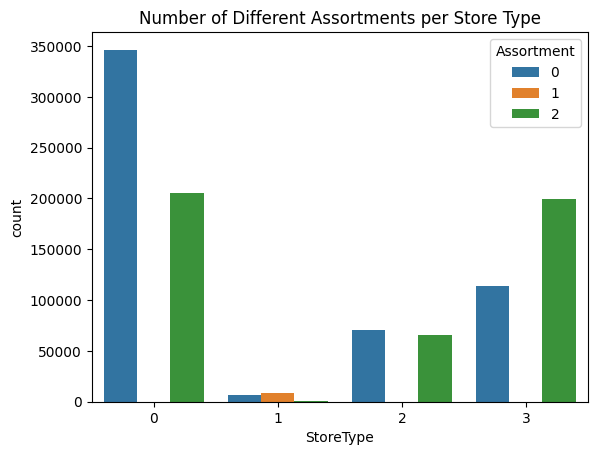

In [47]:
# Chart - 13 visualization code
Storetype_Assortment = sns.countplot(x="StoreType", hue="Assortment", data=final_df, palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
final_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

##### 2. What is/are the insight(s) found from the chart?

We can clearly see here that most of the stores have either a assortment type or c assortment type. Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.

#### Chart - 14 - Correlation Heatmap

<Axes: >

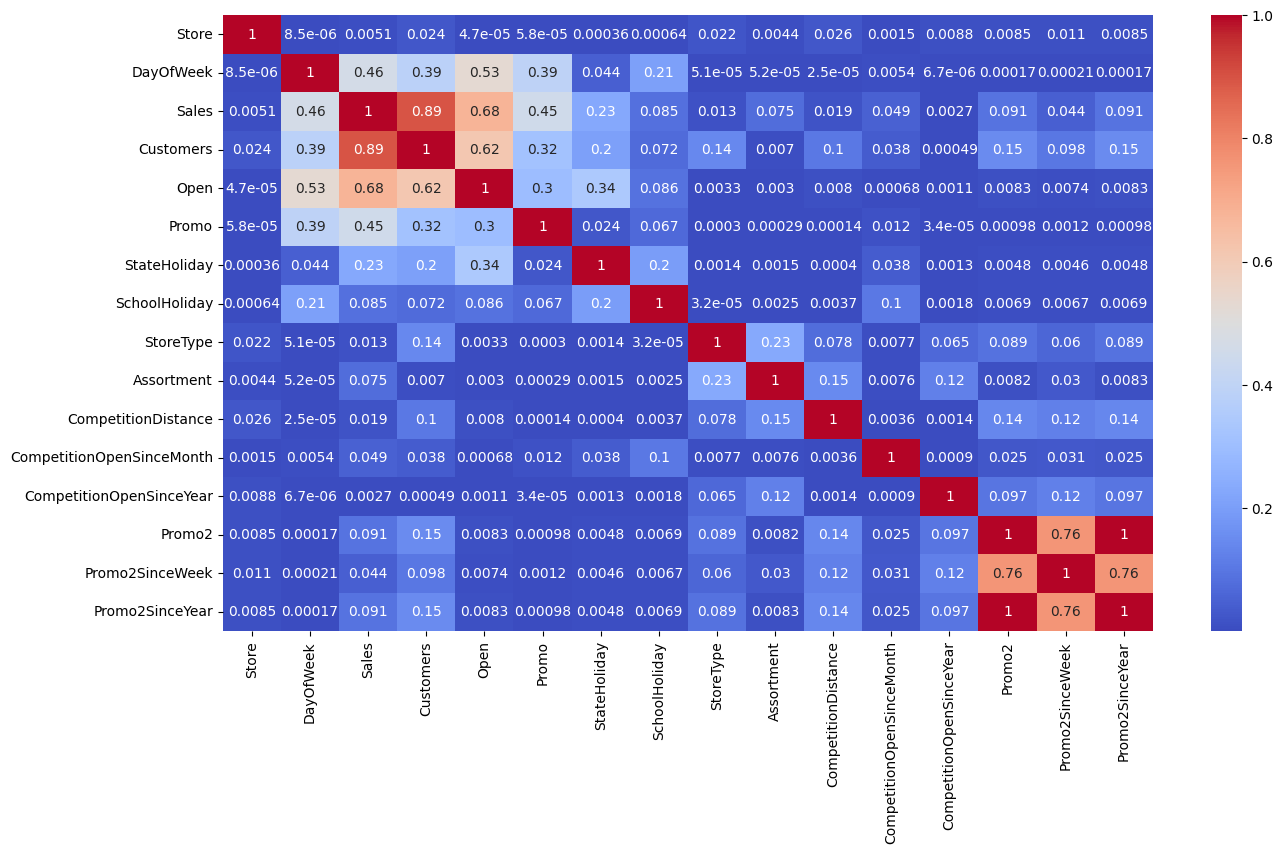

In [48]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### Chart - 15 - Pair Plot 

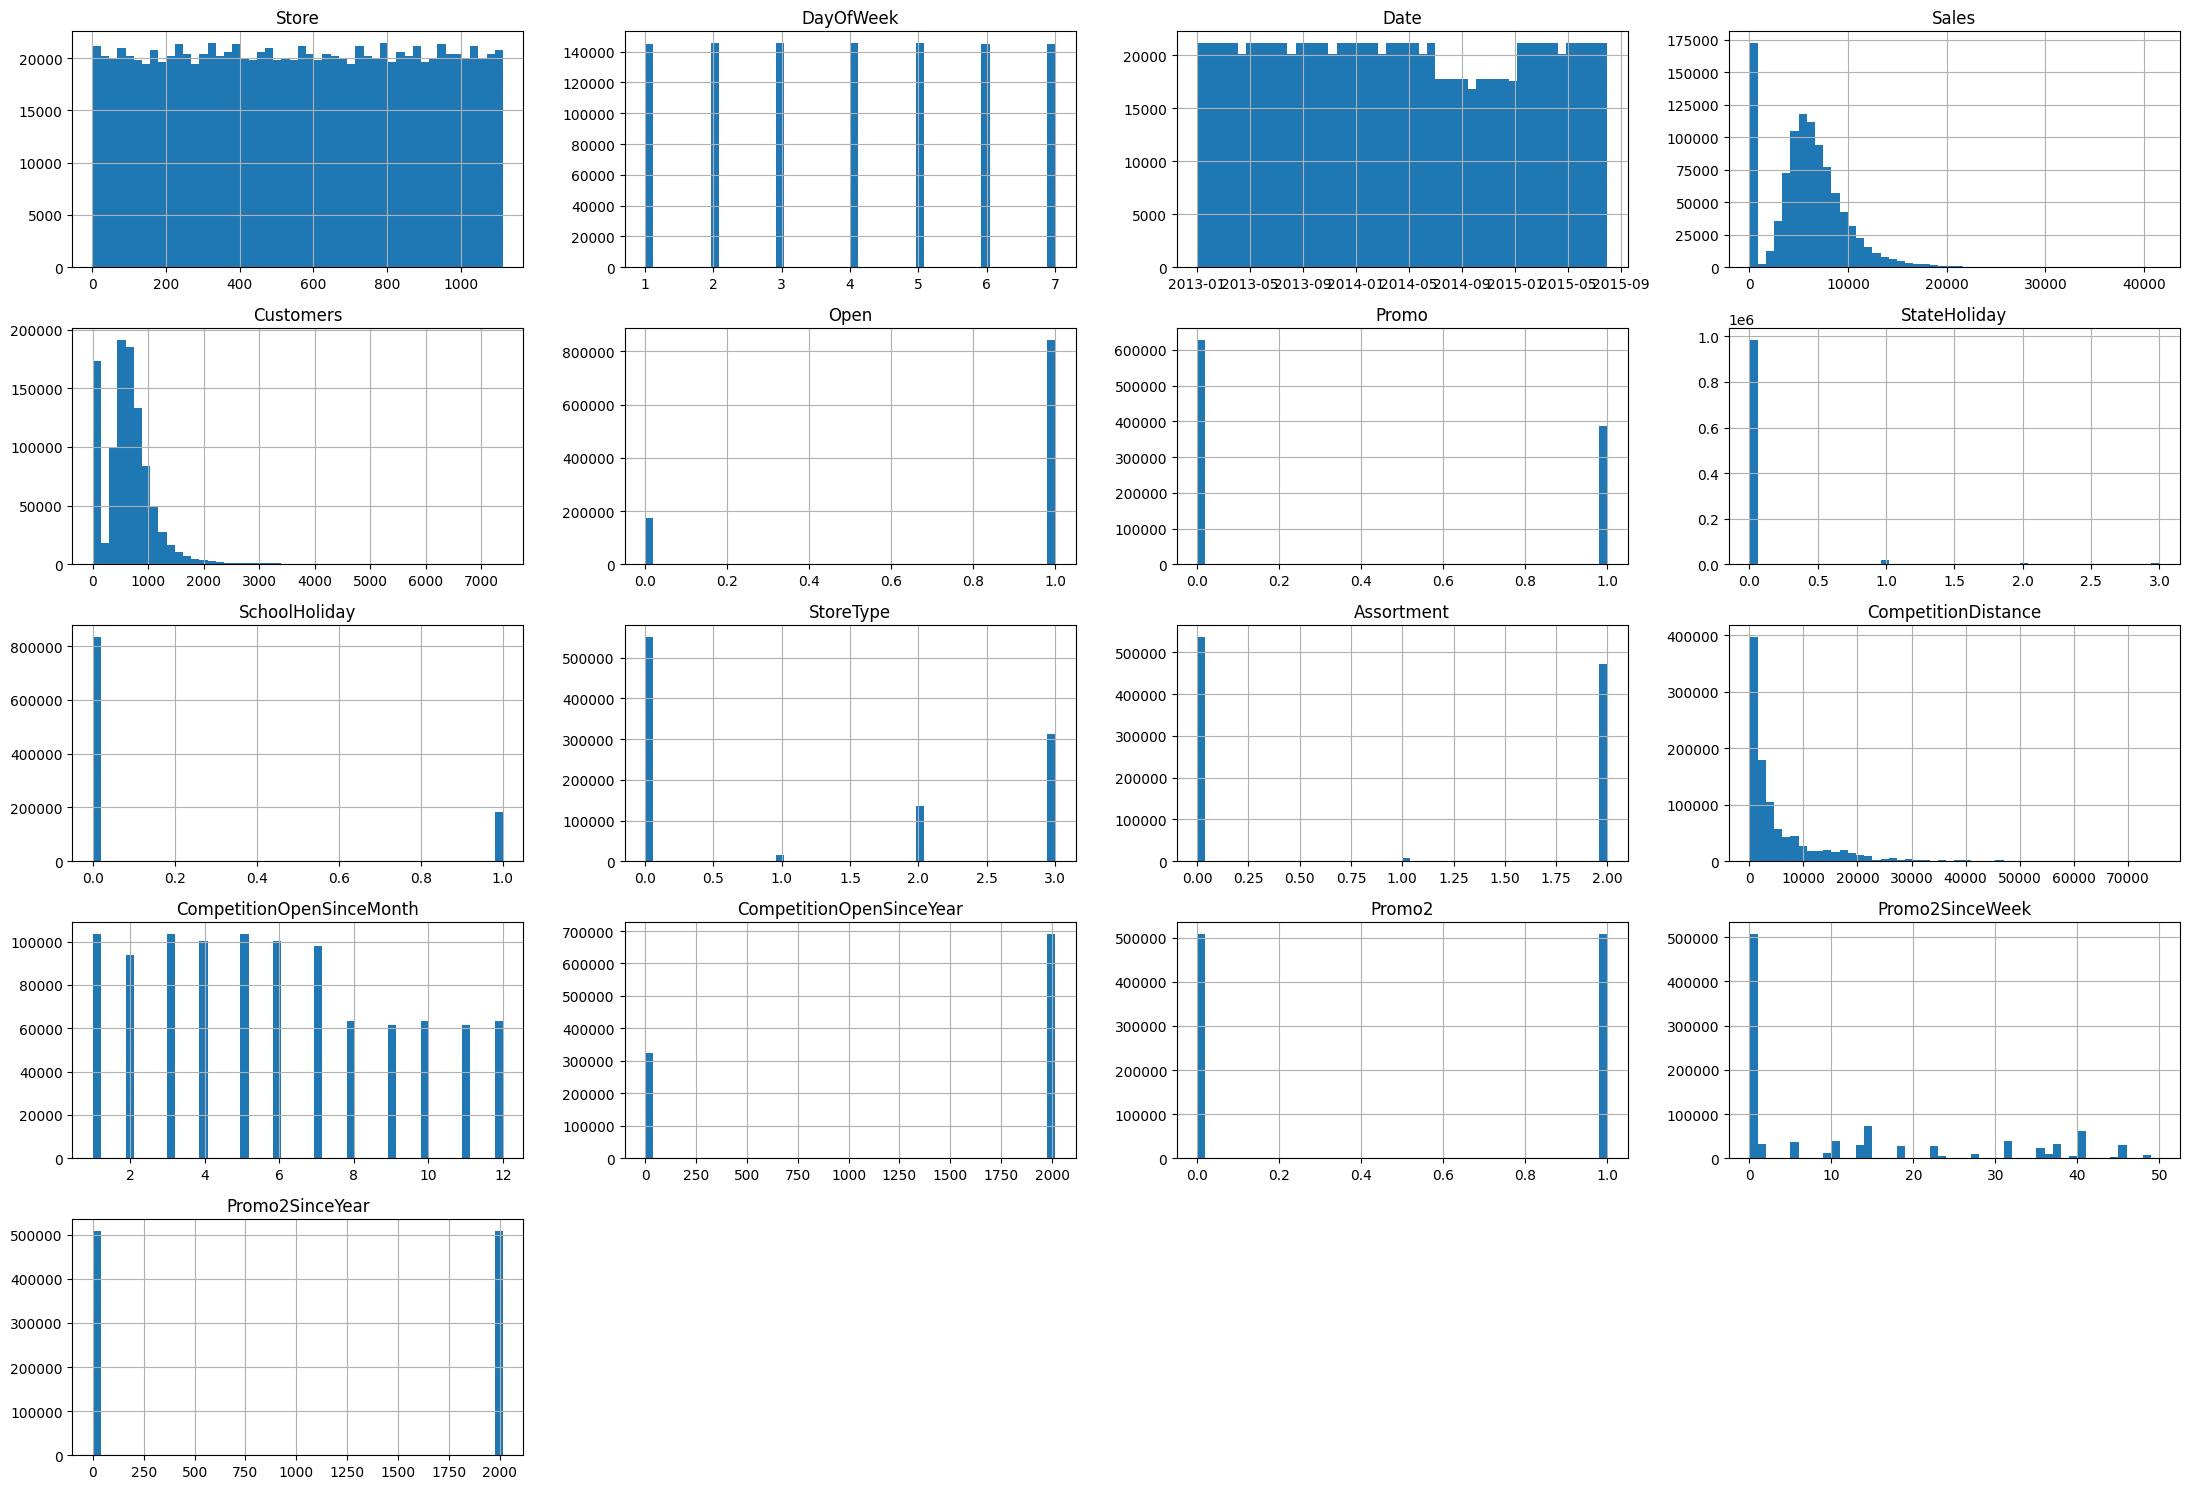

In [49]:
# Pair Plot visualization code

final_df.hist(bins=50, figsize=(22,15))
plt.tight_layout()
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Outliers

<Axes: >

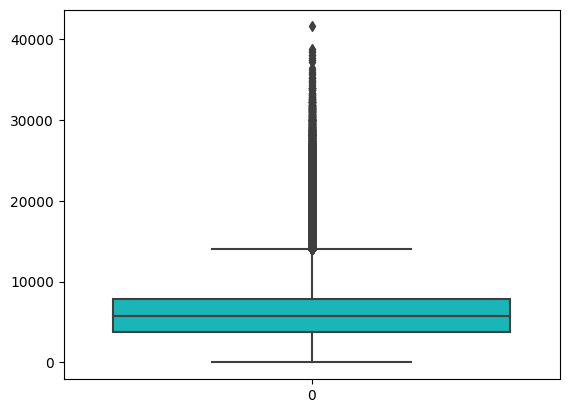

In [53]:
# Handling Outliers & Outlier treatments
sns.boxplot(final_df['Sales'].astype(np.int64), color = "#00CED1")

The boxplot above displays the interquartile range, which is roughly between 4,000 and 7,000, as well as a significant number of outliers, ranging from 14,000 to as high as 42,000.

In [54]:
#statistical values to understand data.
val1 = final_df['Sales'].mean()
val2 = final_df['Sales'].median()
val3 = final_df['Sales'].mode()

print(f'For the sales column:\nMean: {val1}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 5773.818972305593
Median: 5744.0
Mode: 0    0
Name: Sales, dtype: int64


Maximum Data lies between the 100% quertile range of 0 - 14,000.

Outliers are seen after 14,000.

Outliers will not be removed now as the zero sales looks important for further EDA.

The Mean median and mode will change when the 0 sales figures and outliers will be removed.

# **Cheking Distribution for Independent Variables**

In [55]:
numeric_features = final_df.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

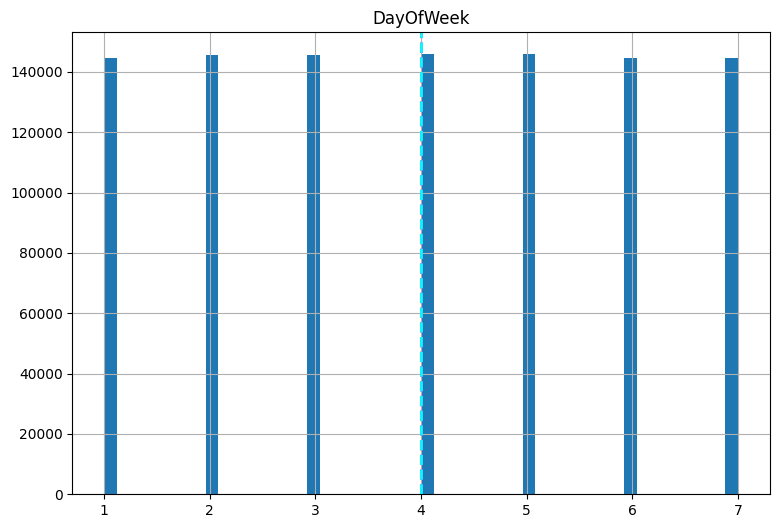

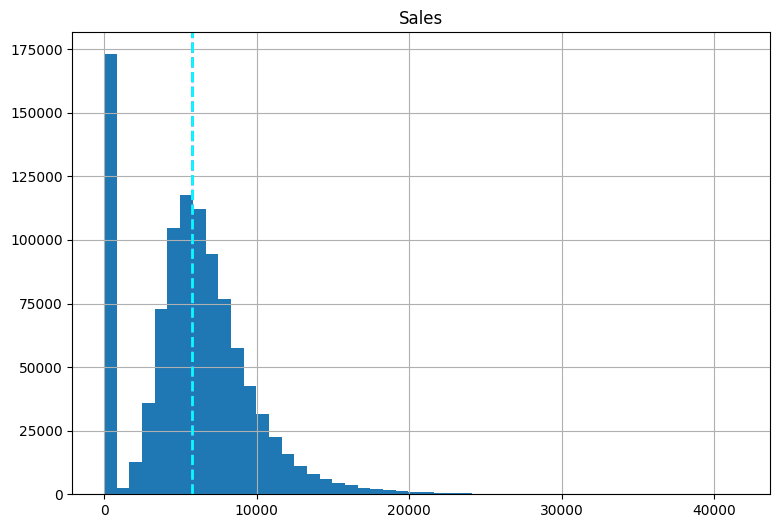

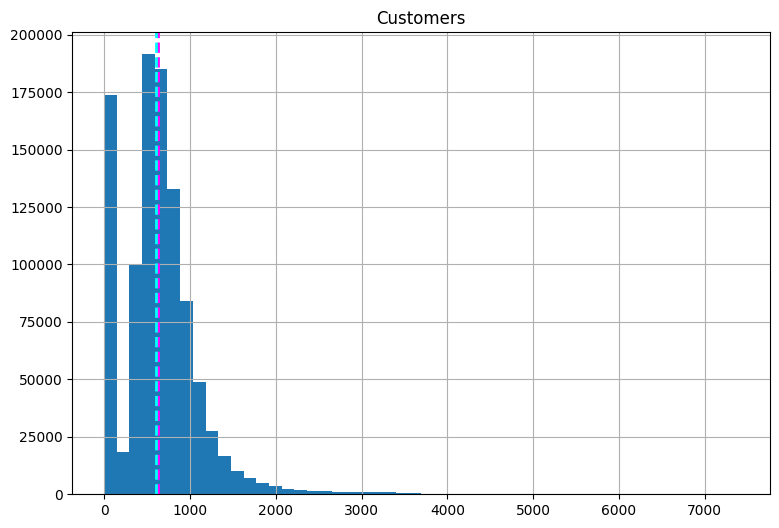

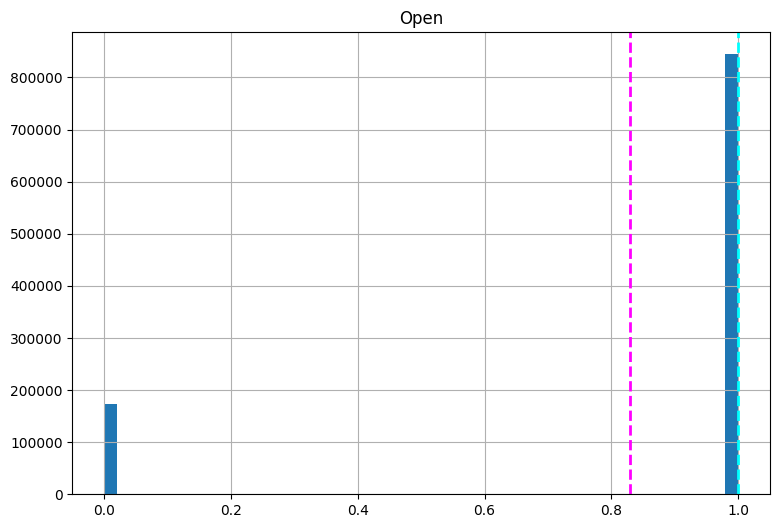

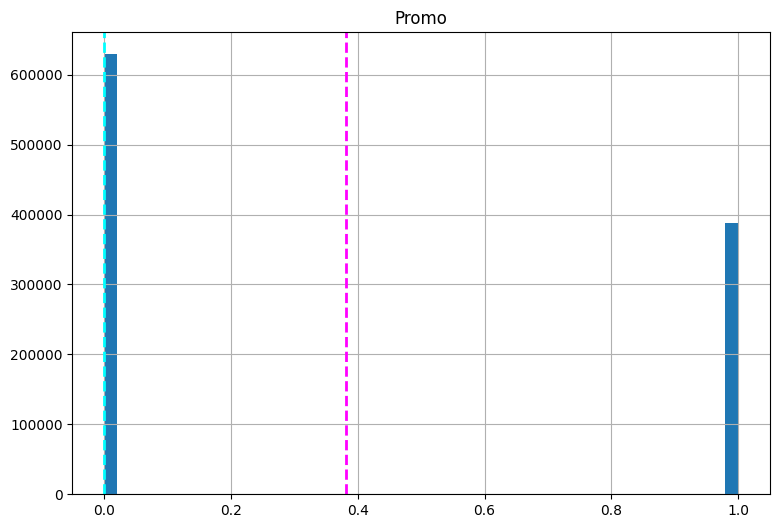

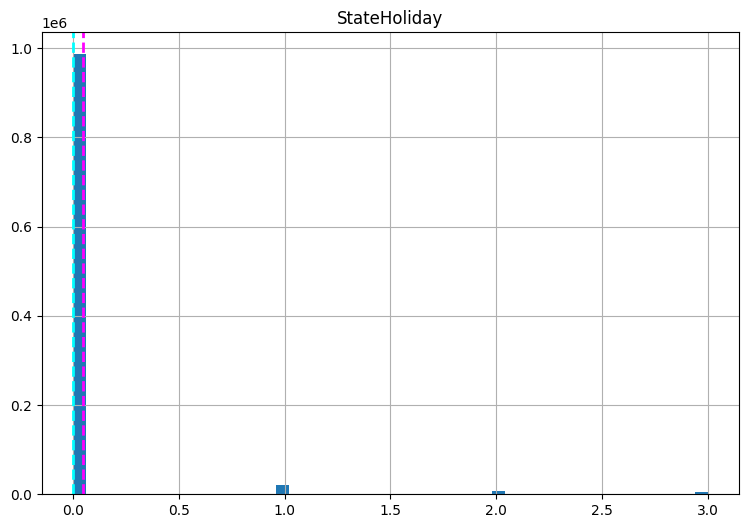

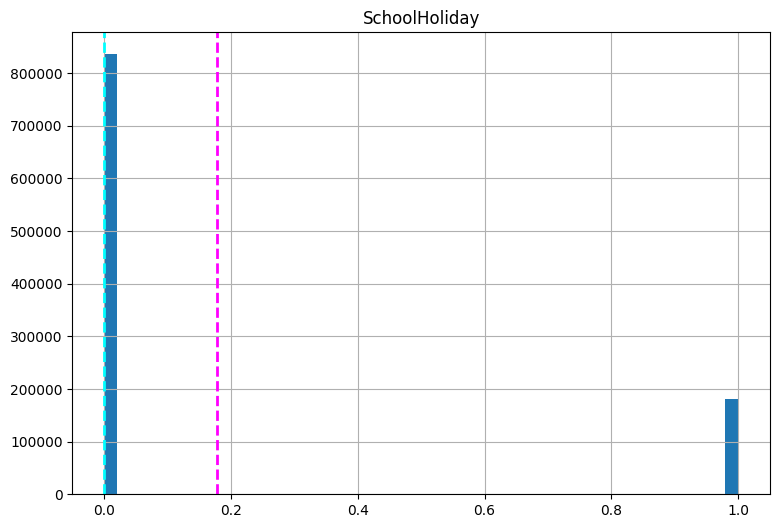

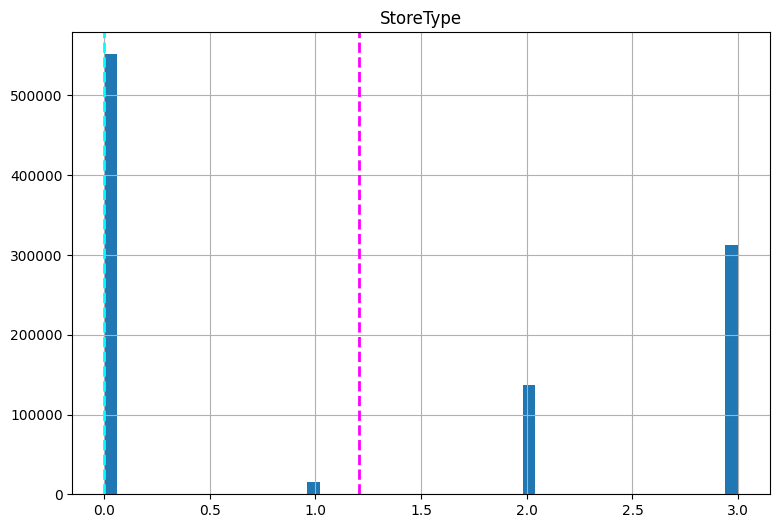

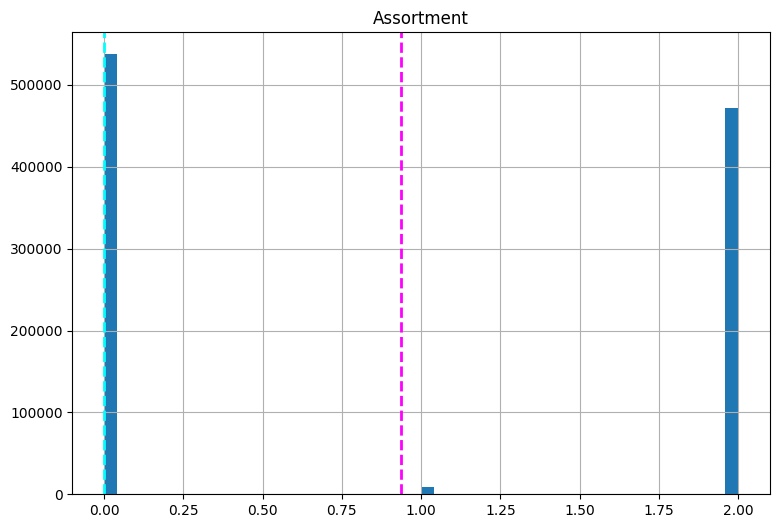

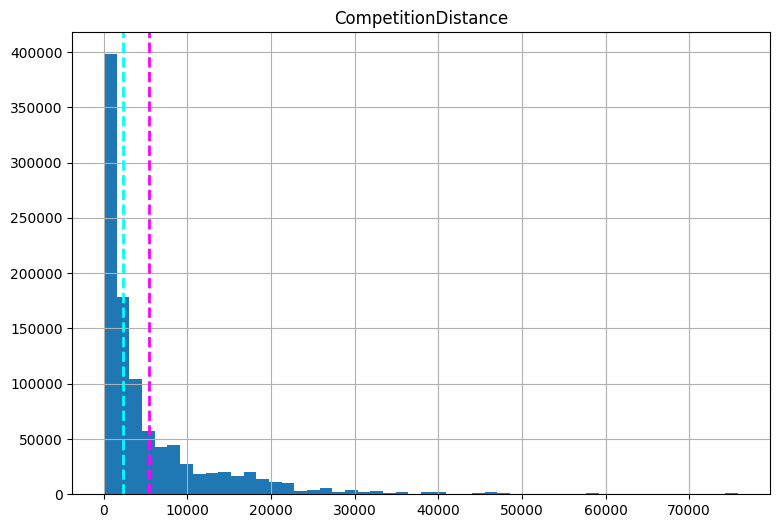

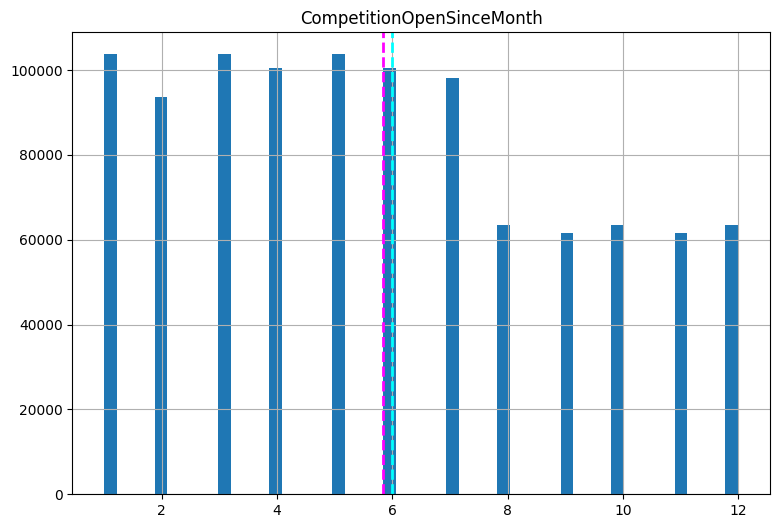

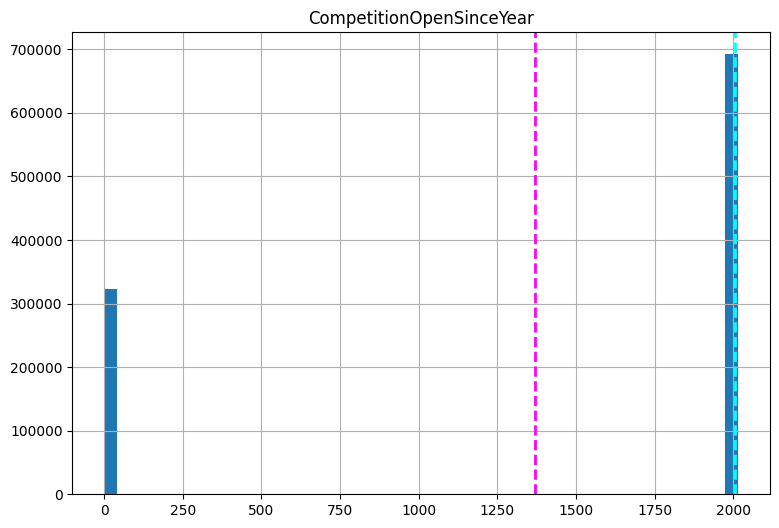

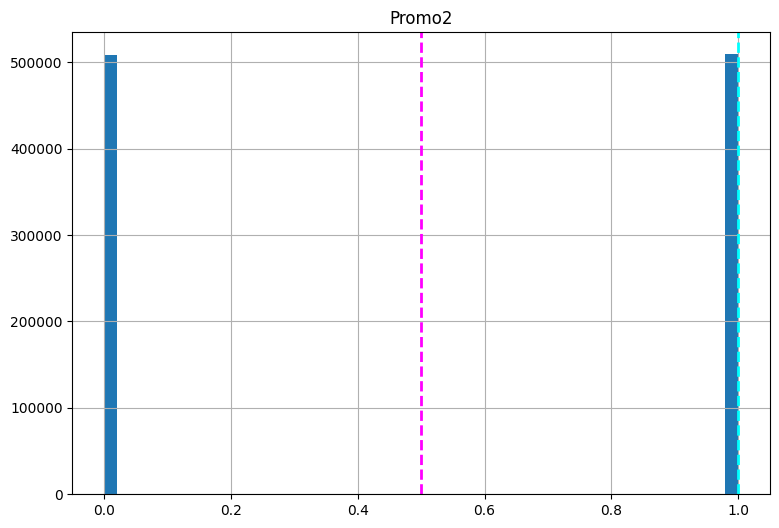

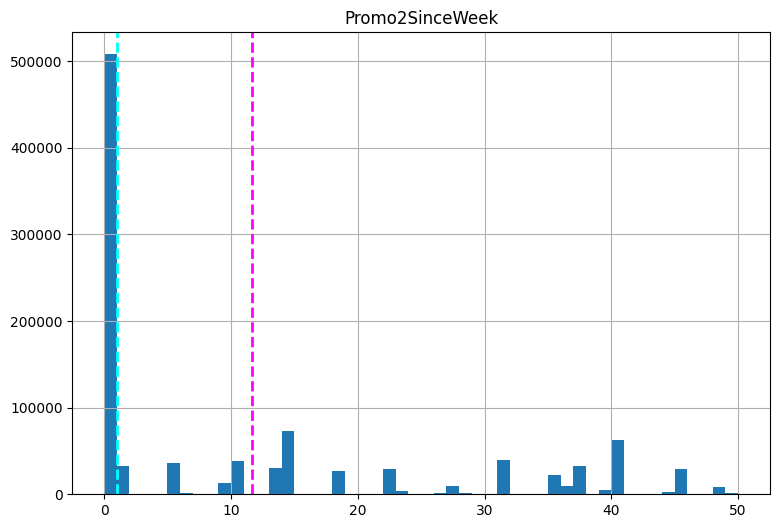

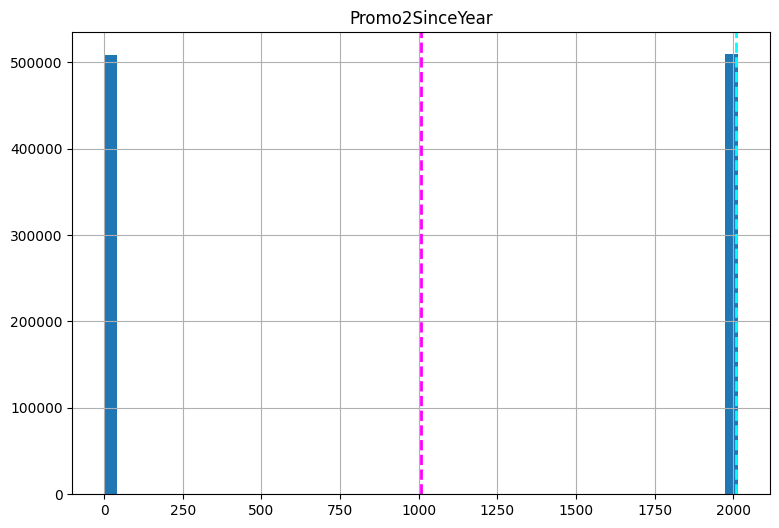

In [56]:
# plot a bar plot for each numerical feature count (except Store)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# Correlation

In [57]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

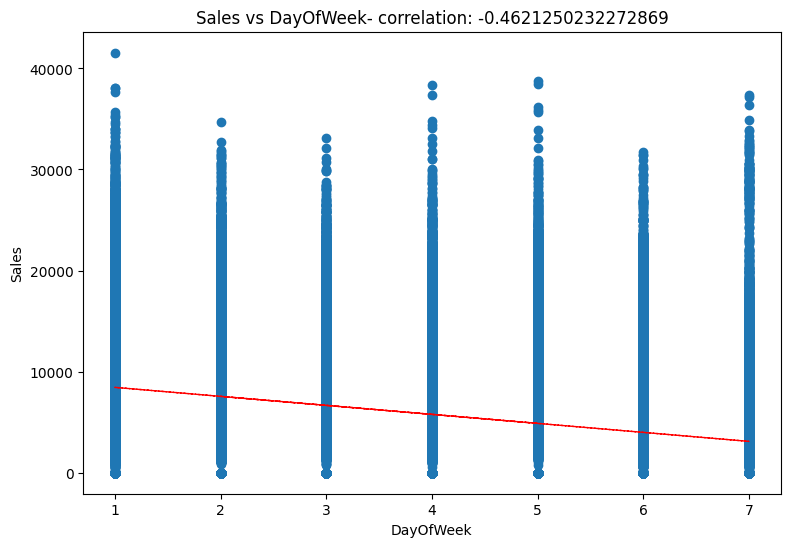

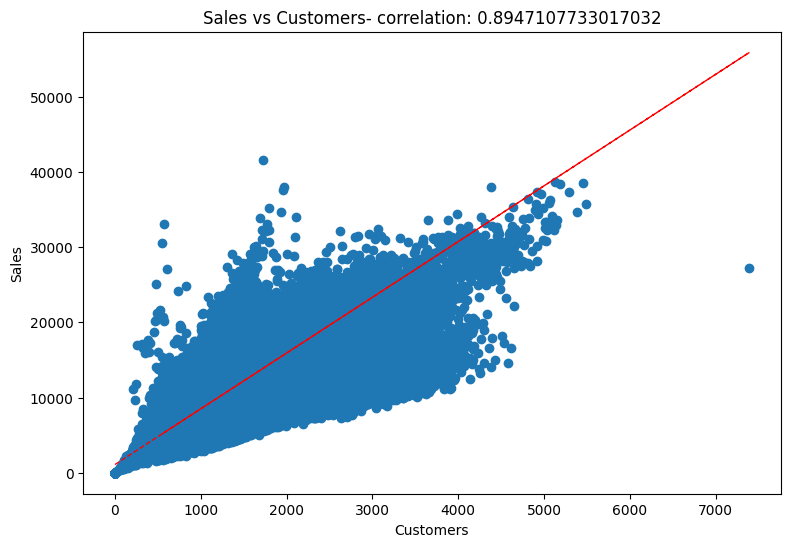

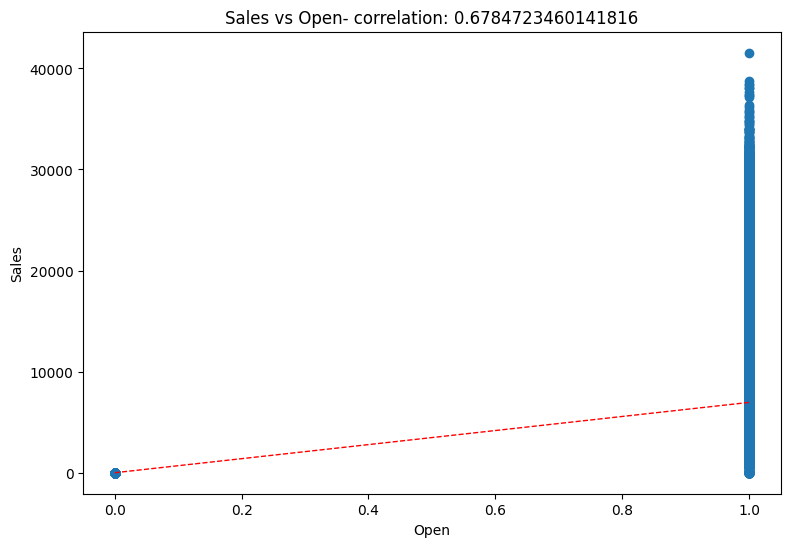

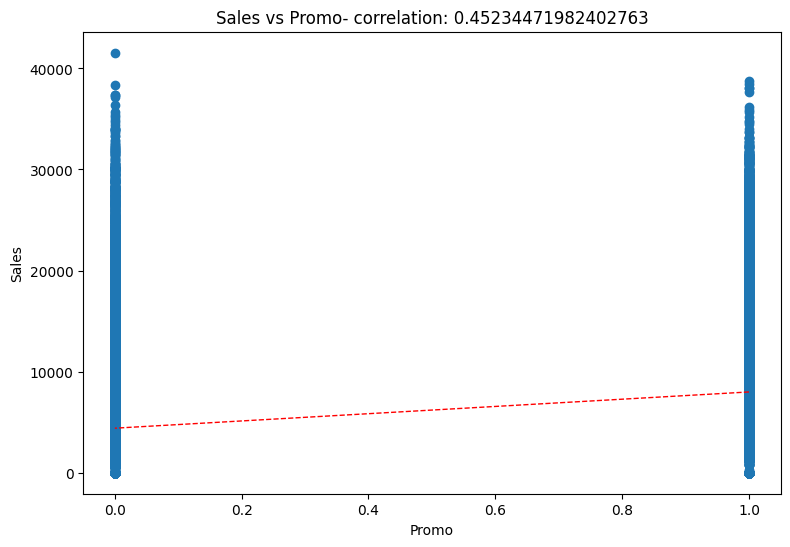

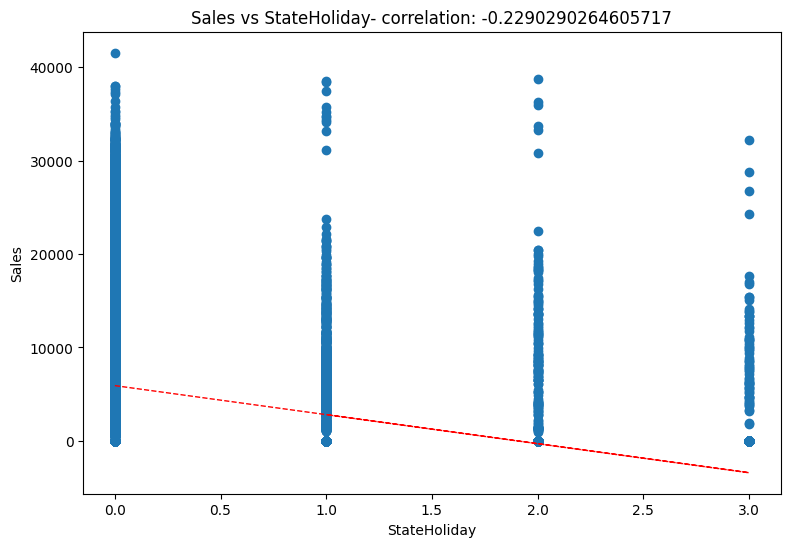

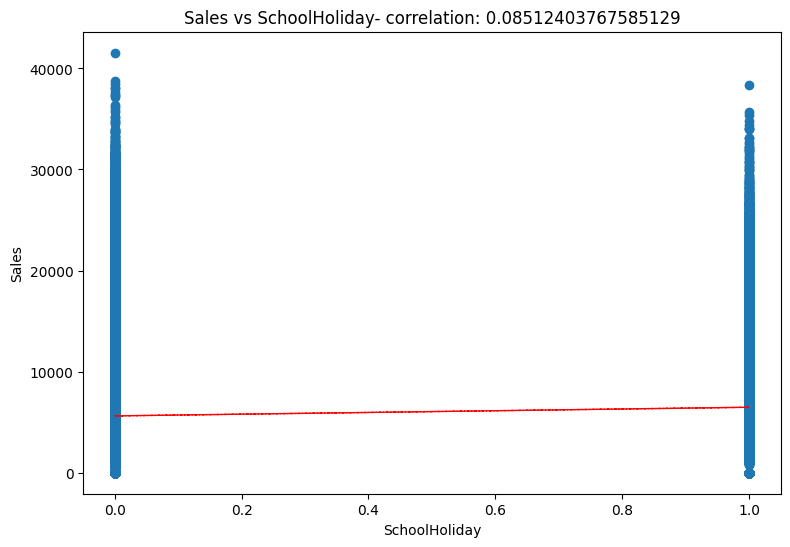

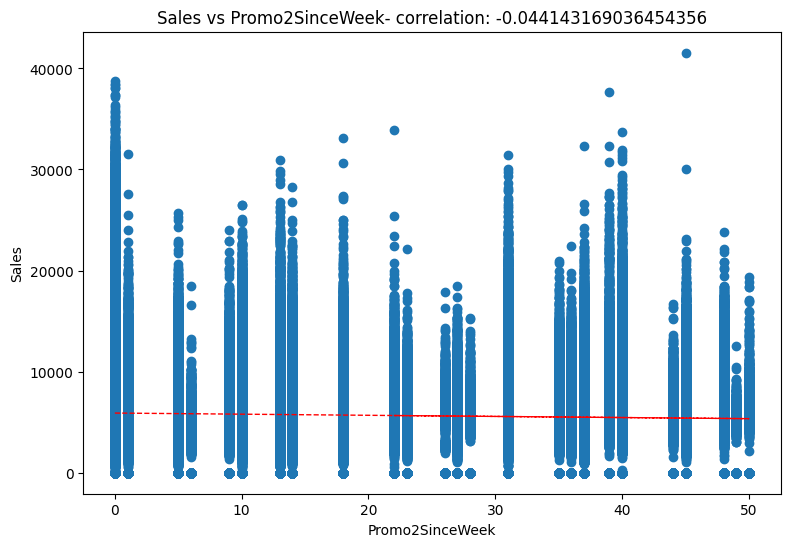

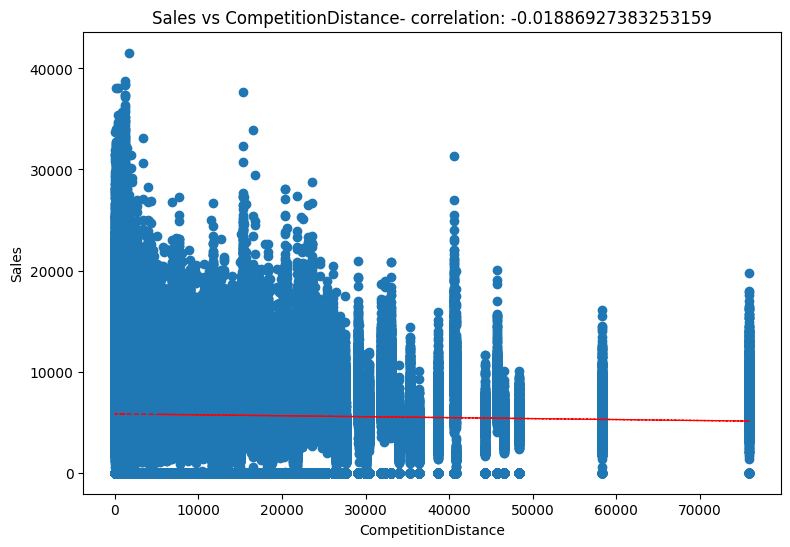

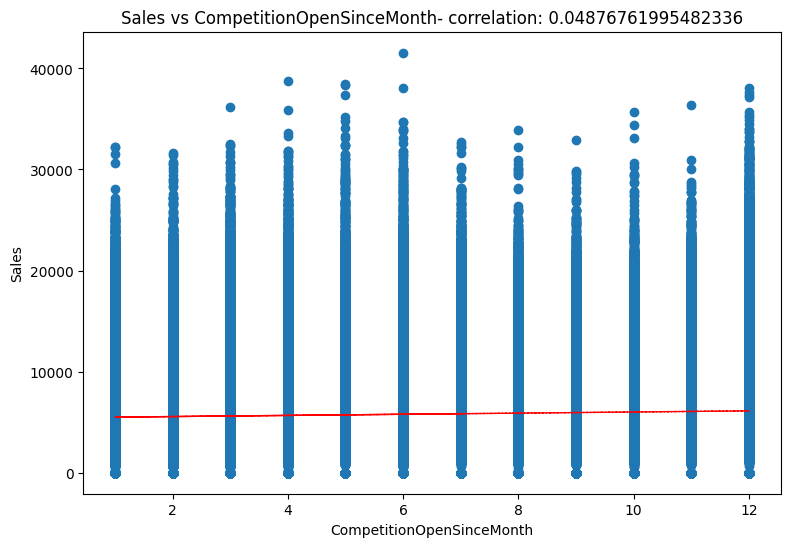

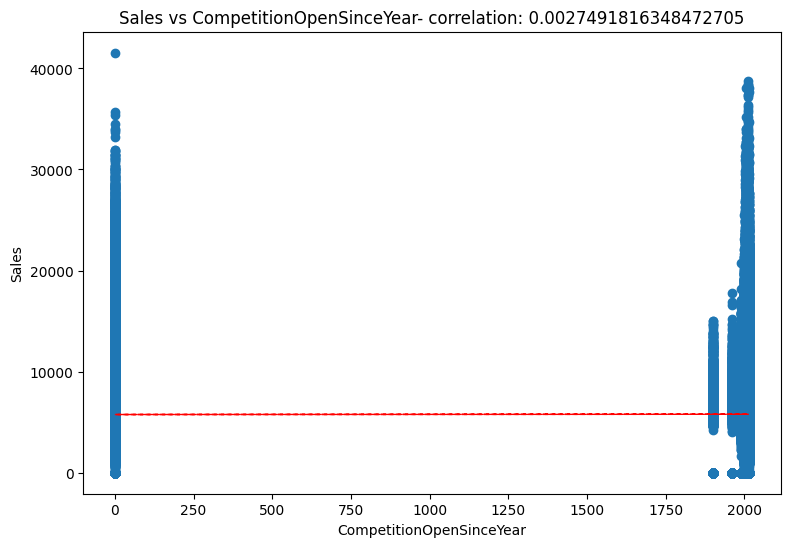

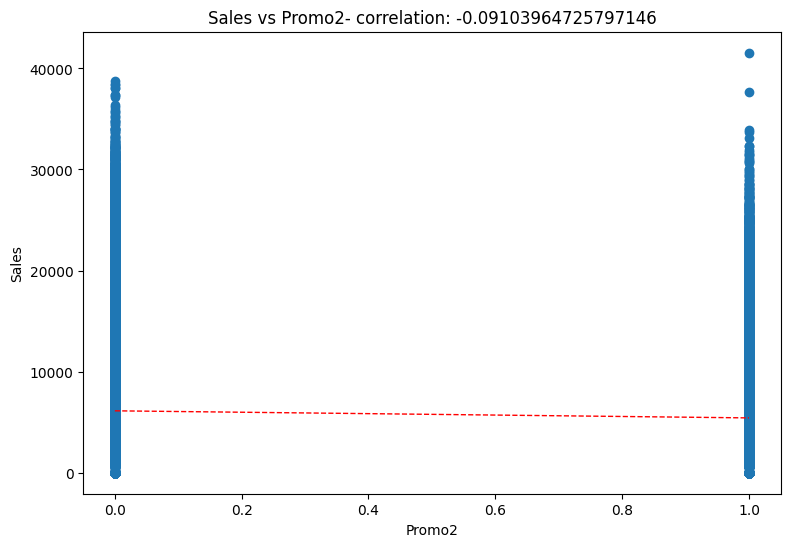

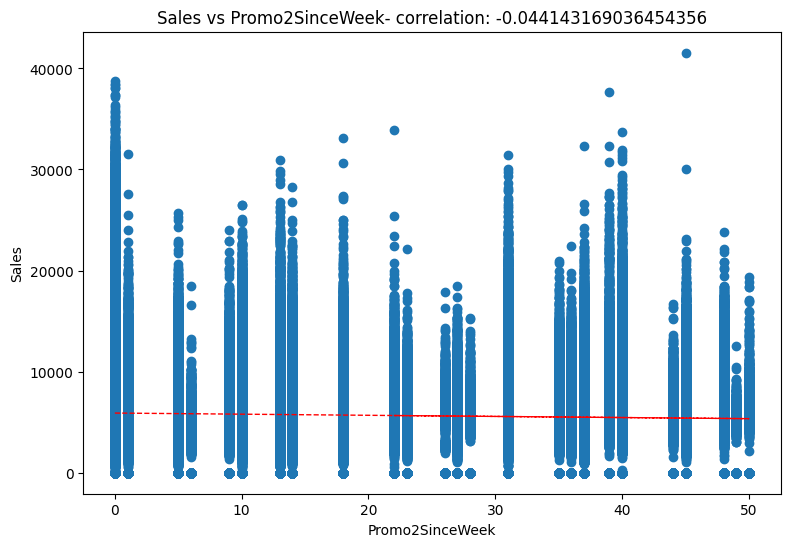

In [58]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

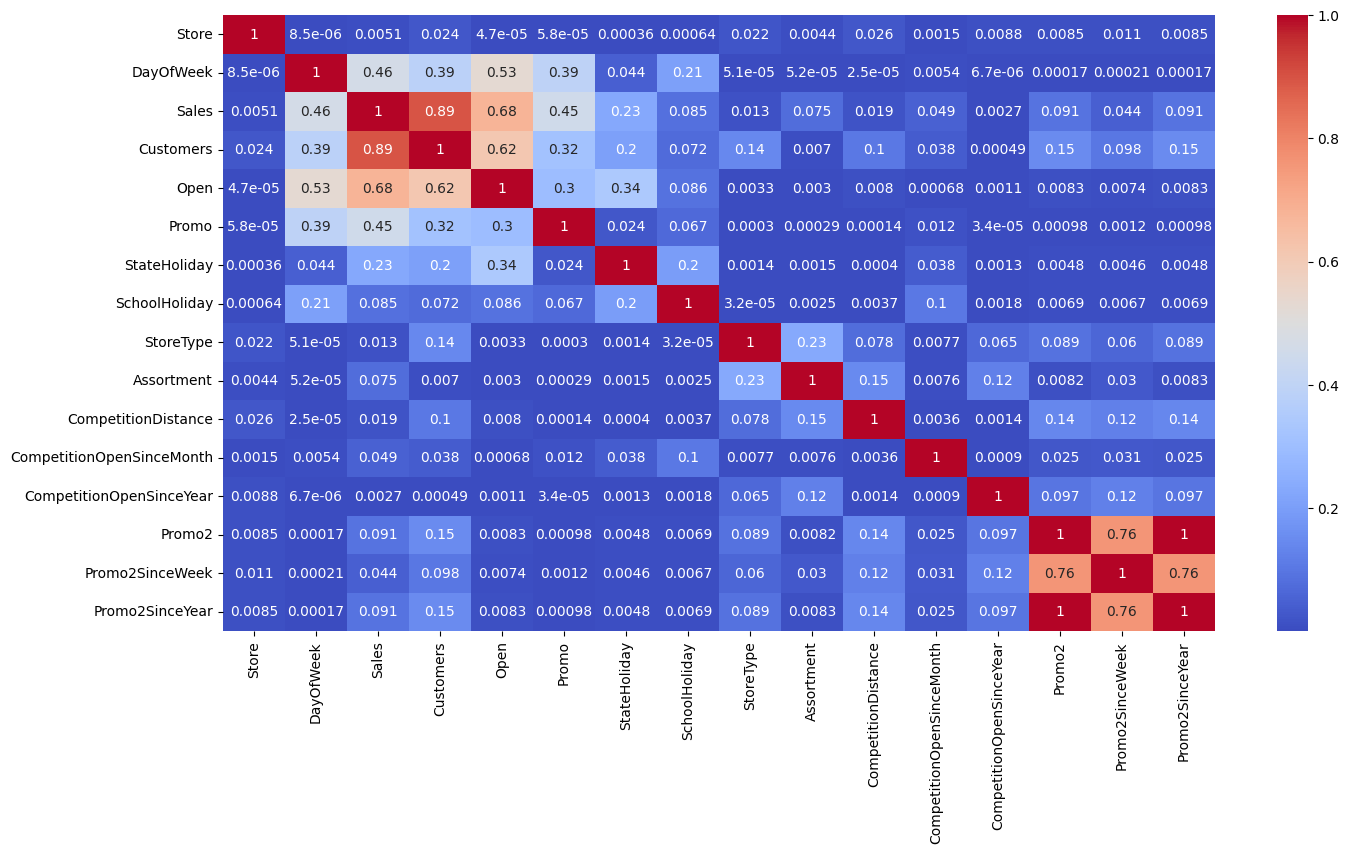

In [59]:
 ## Correlation
plt.figure(figsize=(16,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698849e+00
1,DayOfWeek,4.105225e+00
2,Customers,5.237282e+00
3,Open,9.376848e+00
4,Promo,1.917234e+00
5,StateHoliday,1.187994e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.940349e+00
8,Assortment,2.045194e+00
9,CompetitionDistance,1.591292e+00


In [62]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales','Open']]])

,variables,VIF
0,Store,3.581660e+00
1,DayOfWeek,4.093455e+00
2,Customers,3.081036e+00
3,Promo,1.880866e+00
4,StateHoliday,1.116455e+00
5,SchoolHoliday,1.314955e+00
6,StoreType,1.882001e+00
7,Assortment,2.040948e+00
8,CompetitionDistance,1.535755e+00
9,CompetitionOpenSinceMonth,3.745988e+00


Multicolinearity of columns like 'Promo2SinceYear' is pretty high so we decided to drop it

In [63]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales','Open','Promo2SinceYear']]])

,variables,VIF
0,Store,3.579562
1,DayOfWeek,4.093159
2,Customers,3.080994
3,Promo,1.880794
4,StateHoliday,1.116449
5,SchoolHoliday,1.314926
6,StoreType,1.875764
7,Assortment,2.035440
8,CompetitionDistance,1.528905
9,CompetitionOpenSinceMonth,3.745011


Now for each feature VIF values below 10. That's look pretty fine.

# Analysis on Sales - Dependent variable

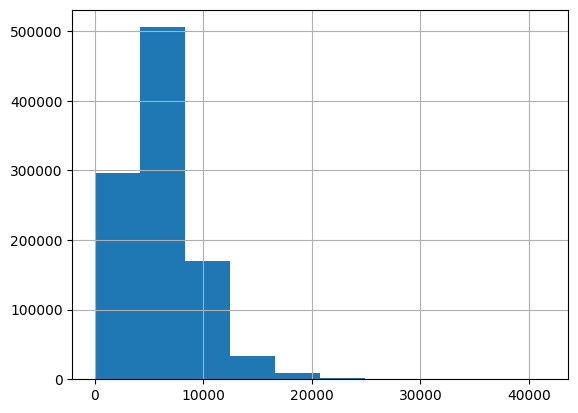

In [64]:
pd.Series(final_df['Sales']).hist()
plt.show()

Now checking for number of sales =0.

In [65]:
final_df[(final_df.Open == 0) & (final_df.Sales == 0)].count()[0]

172817

We see that 172817 times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [66]:
new_df = final_df.drop(final_df[(final_df.Open == 0) & (final_df.Sales == 0)].index)

In [67]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [68]:
new_df.shape

(844392, 18)

### 2. Categorical Encoding for New DataFrame

**PromoInterval to be changed into dummies as it is categorical feature.**

In [69]:
# Encode your categorical columns
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [70]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


## ***7. ML Model Implementation***

In [71]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

# MODEL 1 (excluding rows which has sales =0)

We were confused about whether to include rows where sales value is 0.So first we built a model excluding sales value and then including those values

In [72]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [73]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [74]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [75]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [76]:
# Transforming Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [77]:
reg = LinearRegression().fit(X_train, y_train)

In [78]:
reg.score(X_train, y_train)

0.7635205395565214

In [79]:
reg.coef_

array([-1.79583394e+02, -4.11142531e+02,  3.49176926e+04, -3.77945798e+12,
        1.29636640e+03, -3.84398254e+03,  3.62948861e+01,  8.30079954e+02,
        4.44515872e+02,  2.19313766e+03,  3.29547946e+02,  1.69926142e+02,
       -5.12168293e+14,  6.25180539e+02, -6.92330150e+14, -1.80161858e+14,
       -1.80161858e+14, -1.80161858e+14])

In [80]:
reg.intercept_

692330150355007.6

In [81]:
y_pred = reg.predict(X_test)
y_pred

array([5324.875, 4849.875, 7239.25 , ..., 4098.125, 7772.125, 5368.   ])

In [82]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [83]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.   , 6803.75 , 6698.875, ..., 7914.   , 6883.625, 6123.875])

In [84]:
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [85]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265479.234273966
RMSE : 1505.15090083153


In [86]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634834970255266


# LASSO

In [87]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [88]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [89]:
y_pred_lasso = L1.predict(X_test)
y_pred_lasso

array([5325.7690894 , 4851.11345685, 7231.50932628, ..., 4103.42321461,
       7772.10314532, 5369.67015288])

In [90]:
L1.score(X_test, y_test)

0.7634622998886873

In [91]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5495,5325.769089
1,5472,4851.113457
2,7969,7231.509326
3,7384,6082.919827
4,13212,7826.840239
...,...,...
168874,16337,16387.400198
168875,9195,7061.070926
168876,2938,4103.423215
168877,10413,7772.103145


# RIDGE

In [99]:
L2 = Ridge(alpha = 0.5)

In [100]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [101]:
L2.predict(X_test)

array([5324.58669315, 4849.57993301, 7238.52695963, ..., 4098.20385627,
       7771.95629569, 5367.90843034])

In [102]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [103]:
L2.score(X_test, y_test)

0.763483146317053

# DECISION TREE

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

### ML Model - 2  (By taking whole Dataset)

**We use dummy variables for the column 'PromoInterval'**

In [105]:
final_df = pd.get_dummies(final_df, columns=['PromoInterval'])

In [106]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [94]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***